Mecab について
https://taku910.github.io/mecab/#usage-tools2

In [ ]:
# brew install mecab
# brew install mecab-ipadic
# pip install mecab-python3

In [86]:
#neko.txtをインストール
!wget https://nlp100.github.io/data/neko.txt
 
#形態素解析
!mecab ./neko.txt -o ./neko.txt.mecab

--2023-05-19 18:20:34--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.110.153, 185.199.111.153, 185.199.109.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt.1’

neko.txt.1          100%[===================>] 952.92K  2.66MB/s    in 0.3s    

2023-05-19 18:20:35 (2.66 MB/s) - ‘neko.txt.1’ saved [975789/975789]



In [87]:
# 30 形態素解析結果の読み込み
""" 
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
"""

result = []
sentence = [] 
 
for lis in open("neko.txt.mecab"):
    l1 = lis.split("\t")
    if len(l1) == 2:
      l2 = l1[1].split(",")
      sentence.append({"surface": l1[0], "base": l2[6], "pos": l2[0], "pos1": l2[1]})
      if l2[1] == "句点":
        result.append(sentence)
        sentence = []
 
result

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
  {'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'},
  {'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'},
  {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '', 'base': '*\n', 'pos': '記号', 'pos1': '一般'},
  {'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surfa

In [88]:
# 31 動詞 (表層形)
surface_verb = set()

for lis in result:
  for dic in lis:
    if dic["pos"] == "動詞":
      surface_verb.add(dic["surface"])

print(surface_verb)

{'あける', '起ら', '証す', '思い立っ', 'いただき', '呼ん', '惚れ込ま', '余す', 'うなら', '引きかえそ', '撮っ', 'つかまえ', '飛び出す', '睨ま', '下げ', 'おどかす', 'やっ', 'ぶらつい', '見廻っ', '張り付け', '明けれ', '有り', '失せる', '申し上げ', '惹か', '考え込む', '改めれ', 'ひやかし', '平らげ', 'うめろ', '熾ん', '綻び', '驚い', '離れ', '果す', '終え', '押し込め', '照り付け', 'ずれ', 'かぶる', 'ぬい', 'かくす', 'せまら', 'おどり', '捕ら', '気に入っ', '割り込む', '還す', '伺わ', '乗り込ん', '追っ', '休み', 'くるまっ', '叶っ', '暮らし', '似', '来たそ', 'まします', 'なろ', '居ら', '逢っ', 'はずす', '取り払わ', '志す', '寝つか', '説く', '寄り添う', 'なす', '容れ', '余っ', 'つまん', '当て', '張り込ん', '痛み入る', 'よそ', 'もぐり', '焚き', '聞え', '売る', '仕上がっ', 'なりゃ', '殖え', '曝さ', '添う', '向い', '失う', 'がり', '与', '打ち立て', 'がる', '飛び越える', 'とぼけ', '押しつける', '呼びつけ', '離れる', '交ぜ返す', '見抜い', '欺く', '直す', '越せ', 'おい', 'ひる', '見下せる', '間に合っ', '思いつい', 'すべっ', '犯し', '弾い', '追付こ', '溜ら', '得れ', '乱す', '叫ん', 'ひるん', '引け', '滞り', '帰る', '喰う', '退ける', 'もらい', '誂える', '叩き付ける', '詰め', '後れ', '出れ', '恐れ入ら', '憤る', '揃っ', 'さえ', '見せびらかす', '思い出せ', '吹き出す', '飽き飽きし', '出せる', '見せる', '変りゃ', '祟っ', '片付け', '洩らす', '認め', 'さげ', '窘め', '指し', '障っ', '衝く', '見よ', '召し上がれ', 

In [89]:
# 32 動詞の基本形
base_verb = set()
 
for lis in result:
  for dic in lis:
    if dic["pos"] == "動詞":
      base_verb.add(dic["base"])
 
print(base_verb)

{'あける', 'こする', '睨む', '思い立つ', '証す', '係る', '余す', '飛び出す', '打ち抜く', 'おどかす', '畏まる', '輝く', '翻す', '滞る', 'あきれ返る', '失せる', 'つかみ合う', 'のめる', '考え込む', 'はらう', 'へぐ', '果す', '活ける', 'かぶる', 'かくす', '変じる', '刺し通す', 'しゃがむ', 'まかる', 'きかかる', 'こなす', '割り込む', '引ける', '還す', '打てる', 'まします', '放る', '説く', 'はずす', '志す', '寄り添う', 'なす', 'よべる', '講じる', '痛み入る', '充ちる', 'つくろう', '経つ', 'わする', '住み込む', '売る', '迷わす', 'じゃれる', '急ぐ', '添う', '極め込む', '失う', '飛び越える', 'がる', '知らす', '追い廻す', '詰める', '押しつける', '離れる', '交ぜ返す', '注ぐ', '欺く', '思い返す', '直す', '寝かす', '阿る', '聳やかす', 'ひる', '見下せる', '拗じる', '腐れる', '装う', '乱す', '縛り付ける', '帰る', '喰う', '魅入る', '打ち返す', '退ける', '誂える', '叩き付ける', '通り越す', '納まる', 'づける', '憤る', 'かきまぜる', '見せびらかす', '廻れる', '吹き出す', '引き付ける', '突っ伏す', '出せる', '見せる', 'よぶ', '生かす', '洩らす', 'しつける', 'すます', '印す', 'せり出す', '衝く', 'うつす', '引掻く', '出掛ける', '生やす', '合わす', '害す', '見上ぐ', '書き入れる', '眩む', '届け出る', '引き戻す', 'どける', '纏める', '改める', '廃する', '講ずる', 'こじ開ける', 'かき合せる', '感じ入る', '記す', '尽きる', '詰る', '復する', '臨む', '失す', '引っかかる', '挿す', 'す', '悟る', '追いやる', '担う', '進む', 'よごれる', '抜き取る', '悟れ

In [90]:
# 33 「AのB」
a_no_b = set()
 
for lis in result:
  for i in range(len(lis)):
   if lis[i]["pos"] == "名詞" and lis[i + 1]["surface"] == "の" and lis[i + 2]["pos"] == "名詞":
     a_no_b.add(lis[i]["surface"] + lis[i + 1]["surface"] + lis[i + 2]["surface"])
 
print(a_no_b)

{'中の一', '近所の建具', '黒の事', '近来の珍', '愛の第一義', '今の人間', '以前の関係', '車屋の猫', '胃弱のせい', '湯の中', '個性の発達', '御釜の蓋', '迷亭の学理', '何の容赦', '木綿の着物', '垣の功', '縄の具合', 'ぐたぐたの感', '中学の退校', '皮膚の上', '空の縄張', '耶蘇教の神', '夏の末', '月の光', '両者の差', '自分の姓名', '学者の妻', 'こっちの趣向', '毛のよう', '刺の頭', '滑りの難所', '右の端', '肝心のところ', '窟内の霊', '僕の母', '中のもの', '僕の考', '談話の火の手', '表の窮措大', '猫の春', '台所の腰障子', '方の事', '奥様の鼻', '例の曾呂', '近頃の如く', 'グレーの金魚', '無才の小人', '何等の活動', '普通の半可通', '方便の具', '物理の実験', '有余の出征', '館の名誉', '万里の異境', '棚の縁', '賛成の意', '迷亭の文句', '鉄扇の伯父', '交際の区域', '神の手際', '中の活力', '金の依頼', '垣の外', '例の蠅', '嬢の鼻', '鳥の声', '千秋の思', '髯の先', '吾輩の性質', '特別の個性', '友人の迷惑', '大抵の婦人', '車夫の声', '頭の発達', '学の演説', '旦那の事', '相手の声', '女の名前', '私の妻', '色々の方法', '裏の卵', '人間の観察', '仙の格言', '全体の状況', '強盗の一族', '何の真似', '十の時', 'こっちの手', '法螺吹きの分際', '俺の着物', '自分の子', '周囲の境遇', '半の甲', '鰹の切身', '本人のため', '月並の標本', '吾輩の普通', '歳の高齢', 'マンの鼻', '秋の初', '妻の悪口', '今の喧嘩', '同情の至り', 'さんの所', '僕の間', '例の鉄扇', '令嬢の前', '息災の徴', '表の方', '矛盾の変', '上の参考', '隅の方', '彼の顔面', '夢の裡', '学者の頭脳', '露地の白', '的の活力', '行李の影', '師の小説', '今度のお客', '三の端書', '活気の

In [91]:
# 34 名詞の連接
# 名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．
noun_conj_d = {}
noun_conj = ""

for lis in result:
  for dic in lis:
    if dic["pos"] == "名詞":
      noun_conj += dic["surface"]
    else:
      noun_conj_d[noun_conj] = len(noun_conj)
      noun_conj = ""

print([k for k, v in noun_conj_d.items() if v == max(noun_conj_d.values())])

["manyaslip'twixtthecupandthelip", 'Archaiomelesidonophrunicherata']


In [92]:
# 35 単語の出現頻度
from collections import Counter

voc = []

for lis in result:
  for dic in lis:
    if dic["surface"] != "":
      voc.append(dic["surface"])

voc_freq = Counter(voc)
voc_freq_sort = voc_freq.most_common()
print(voc_freq_sort)

[('の', 9194), ('。', 7486), ('て', 6868), ('、', 6772), ('は', 6420), ('に', 6243), ('を', 6071), ('と', 5508), ('が', 5337), ('た', 3988), ('で', 3806), ('「', 3231), ('」', 3225), ('も', 2479), ('ない', 2390), ('だ', 2363), ('し', 2322), ('から', 2032), ('ある', 1728), ('な', 1613), ('ん', 1568), ('か', 1530), ('いる', 1249), ('事', 1207), ('へ', 1034), ('う', 992), ('する', 992), ('もの', 981), ('君', 973), ('です', 973), ('云う', 937), ('主人', 932), ('よう', 696), ('ね', 683), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('一', 554), ('そう', 546), ('何', 539), ('なる', 531), ('さ', 514), ('よ', 509), ('なら', 483), ('吾輩', 481), ('い', 478), ('ます', 458), ('じゃ', 448), ('…', 433), ('これ', 414), ('\u3000', 411), ('なっ', 404), ('それ', 381), ('来', 364), ('れ', 356), ('見', 350), ('でも', 346), ('時', 345), ('迷亭', 343), ('ませ', 330), ('いい', 320), ('三', 319), ('——', 319), ('まで', 313), ('ところ', 313), ('方', 312), ('二', 303), ('ず', 299), ('上', 294), ('まし', 289), ('寒月', 286), ('顔', 282), ('ぬ', 277), ('先生', 274), ('見る', 273), ('人間', 272),

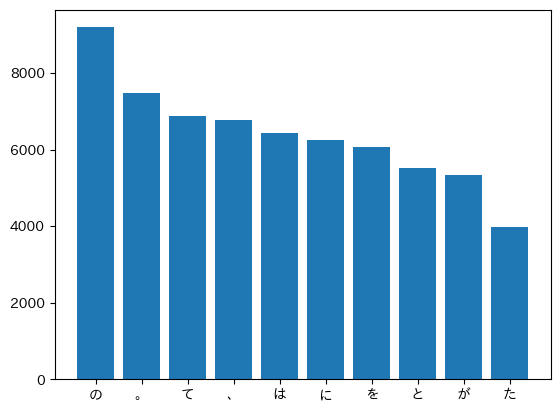

In [93]:
# 36 頻度上位10語
import matplotlib.pyplot as plt
 
#count
word, count = zip(*voc_freq_sort[:10])
 
#plot
fig, ax = plt.subplots()
ax.bar(word, count)
plt.show()

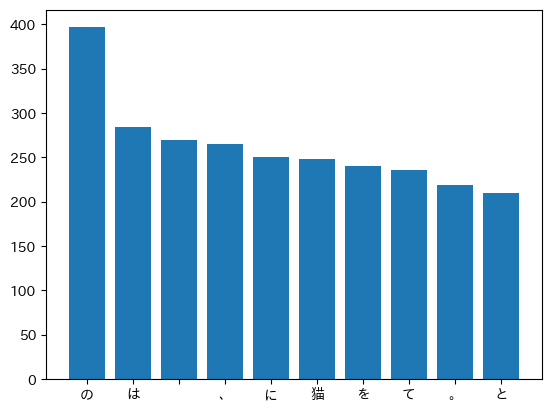

In [94]:
#37 「猫」と共起頻度の高い上位10語
neko_cooccur = []

for lis in result:
  if any(dic["base"] == "猫" for dic in lis):
    for dic in lis:
      neko_cooccur.append(dic["surface"])

#count
count_neko_cooccur = Counter(neko_cooccur)
word, count = zip(*count_neko_cooccur.most_common(10))

#plot
fig, ax = plt.subplots()
ax.bar(word, count)
plt.show()

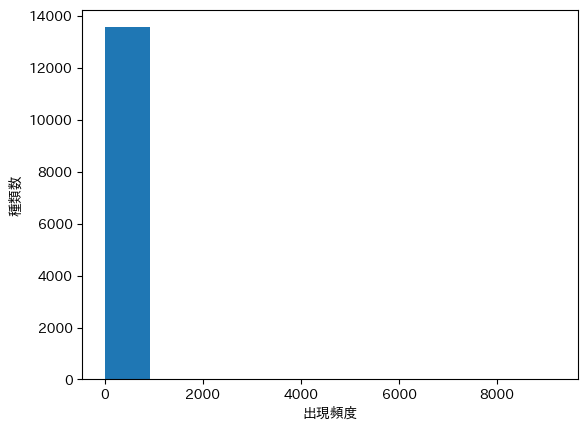

In [96]:
# 38 ヒストグラム
# 横軸は出現頻度(1から単語の出現頻度の最大値まで)
# 縦軸はx軸で示される出現頻度となった単語の異なり数(種類数）

#plot
fig, ax = plt.subplots()
ax.hist(voc_freq.values())
plt.xlabel("出現頻度")
plt.ylabel("種類数")
plt.show()

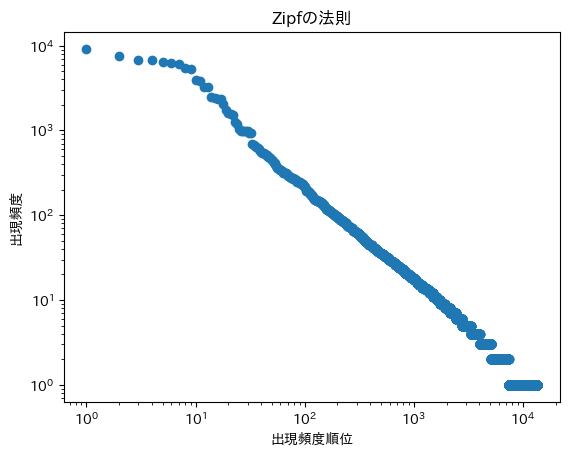

In [97]:
# 39 Zipfの法則
# 単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．
word, count = zip(*voc_freq_sort)

#plot
x = ([i + 1 for i in range(len(count))]) # i:index　順位
y = count
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.xscale("log")
plt.yscale("log")
ax.set_title('Zipfの法則')
ax.set_xlabel('出現頻度順位')
ax.set_ylabel('出現頻度')
plt.show()